## Project credit card holder

### Objective:
- This project aims to create clusters defined according to the characteristics of credit card holders, grouping these holders and characterizing the clusters based on the occurrence of the variables used.

- Esse projeto tem como objetivo criar clusters definidos conforme as características dos titulares de cartão de crédito, agrupando esses titulares e caracterizando os clusters a partir da ocorrência das variáveis utilizadas.

### Data Origin:
- Dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

- The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- O Dataset de amostra resume o comportamento de uso de cerca de 9000 titulares de cartão de crédito ativos durante os últimos 6 meses. O arquivo está em um nível de cliente com 18 variáveis ​​comportamentais.

- A seguir está o Dicionário de Dados para o conjunto de dados de Cartão de Crédito:-

    CUST_ID : Identificação do titular do cartão de crédito (categórico)

    BALANCE : Valor do saldo restante na conta para fazer compras

    BALANCE_FREQUENCY : Com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)

    PURCHASES : Quantidade de compras feitas na conta

    ONEOFF_PURCHASES : Valor máximo de compra feita de uma só vez

    INSTALLMENTS_PURCHASES : Valor da compra feita em parcelas

    CASH_ADVANCE : Dinheiro adiantado dado pelo usuário

    PURCHASES_FREQUENCY : Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = compradas com frequência, 0 = não compradas com frequência)

    ONEOFFPURCHASESFREQUENCY : Com que frequência as compras estão acontecendo de uma só vez (1 = compradas com frequência, 0 = não compradas com frequência)

    PURCHASESINSTALLMENTSFREQUENCY : Com que frequência as compras em parcelas estão sendo feitas (1 = feitas com frequência, 0 = não feito com frequência)

    CASHADVANCEFREQUENCY : Com que frequência o dinheiro adiantado é pago

    CASHADVANCETRX : Número de transações feitas com "Dinheiro adiantado"

    PURCHASES_TRX : Número de transações de compra feitas

    CREDIT_LIMIT : Limite do cartão de crédito para o usuário

    PAYMENTS : Valor do pagamento feito pelo usuário

    MINIMUM_PAYMENTS : Valor mínimo de pagamentos feitos pelo usuário

    PRCFULLPAYMENT : Porcentagem do pagamento integral pago pelo usuário

    TENURE : Prazo do serviço de cartão de crédito para o usuário

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [48]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [49]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import OrdinalEncoder # convertendo dados categoricos em numerico (categoria sequencial)
from sklearn.preprocessing import OneHotEncoder # convertendo dados categoricos em numerico (categoria - coluna)

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computaçaõ de matrizes

In [50]:
# carregando arquivo de dados de cotações financeiras
df_card = pd.read_csv('dataset/Credit_Card_GENERAL.csv', sep=',')

In [51]:
# verificando a quantidade de linhas e colunas do dataframe
df_card.shape

(8950, 18)

In [52]:
# reconhecendo as primeiras linhas do dataframe
df_card.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


- Vamos modificar inicialmente o nome das colunas para facilitar o trabaho

In [53]:
# renomeando as colunas para facilitar o trabalho
df_card.columns = ['titular', 'saldo_cred_restante', 'freq_atu_saldo', 'qtde_compras', 'vr_max_compra_feita', \
                   'vr_compra_feita_parcelas', 'dinh_adiantado_usu', 'freq_compras', 'freq_compras_1vez', \
                   'freq_compras_parcelas', 'freq_pag_dinh_adiantado', 'trans_dinh_adiantado', 'trans_compra_feita', \
                   'limite_cartao', 'vr_pag_feito_usu', 'vr_min_pagtos_feito_usu', '%pag_integral_feito_usu', \
                   'prazo_serv_cartao_usu'
                  ]

In [54]:
# verificando a renomeação das colunas
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   titular                   8950 non-null   object 
 1   saldo_cred_restante       8950 non-null   float64
 2   freq_atu_saldo            8950 non-null   float64
 3   qtde_compras              8950 non-null   float64
 4   vr_max_compra_feita       8950 non-null   float64
 5   vr_compra_feita_parcelas  8950 non-null   float64
 6   dinh_adiantado_usu        8950 non-null   float64
 7   freq_compras              8950 non-null   float64
 8   freq_compras_1vez         8950 non-null   float64
 9   freq_compras_parcelas     8950 non-null   float64
 10  freq_pag_dinh_adiantado   8950 non-null   float64
 11  trans_dinh_adiantado      8950 non-null   int64  
 12  trans_compra_feita        8950 non-null   int64  
 13  limite_cartao             8949 non-null   float64
 14  vr_pag_f

- Observando que a quantidade de linhas sem nulos é o mesmo da quantidade total de linhas do dataframe, portanto até esse momento não há nulos.

In [55]:
# confirmando a inexistência de nulos
df_card.isnull().sum()

titular                       0
saldo_cred_restante           0
freq_atu_saldo                0
qtde_compras                  0
vr_max_compra_feita           0
vr_compra_feita_parcelas      0
dinh_adiantado_usu            0
freq_compras                  0
freq_compras_1vez             0
freq_compras_parcelas         0
freq_pag_dinh_adiantado       0
trans_dinh_adiantado          0
trans_compra_feita            0
limite_cartao                 1
vr_pag_feito_usu              0
vr_min_pagtos_feito_usu     313
%pag_integral_feito_usu       0
prazo_serv_cartao_usu         0
dtype: int64

- Confirmando, através da função isnull(), que não existe nenhum nulo nas linhas do dataframe.

In [56]:
df_card = df_card.dropna()

In [57]:
# confirmando a inexistência de nulos
df_card.isnull().sum()

titular                     0
saldo_cred_restante         0
freq_atu_saldo              0
qtde_compras                0
vr_max_compra_feita         0
vr_compra_feita_parcelas    0
dinh_adiantado_usu          0
freq_compras                0
freq_compras_1vez           0
freq_compras_parcelas       0
freq_pag_dinh_adiantado     0
trans_dinh_adiantado        0
trans_compra_feita          0
limite_cartao               0
vr_pag_feito_usu            0
vr_min_pagtos_feito_usu     0
%pag_integral_feito_usu     0
prazo_serv_cartao_usu       0
dtype: int64

In [63]:
df_card.shape

(8636, 18)

In [58]:
# verificando se existe registros duplicados
df_card.duplicated().sum()

0

In [64]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   titular                   8636 non-null   object 
 1   saldo_cred_restante       8636 non-null   float64
 2   freq_atu_saldo            8636 non-null   float64
 3   qtde_compras              8636 non-null   float64
 4   vr_max_compra_feita       8636 non-null   float64
 5   vr_compra_feita_parcelas  8636 non-null   float64
 6   dinh_adiantado_usu        8636 non-null   float64
 7   freq_compras              8636 non-null   float64
 8   freq_compras_1vez         8636 non-null   float64
 9   freq_compras_parcelas     8636 non-null   float64
 10  freq_pag_dinh_adiantado   8636 non-null   float64
 11  trans_dinh_adiantado      8636 non-null   int64  
 12  trans_compra_feita        8636 non-null   int64  
 13  limite_cartao             8636 non-null   float64
 14  vr_pag_feito_

In [59]:
# verificando o conteudo de cada coluna (variável) do dataframe
df_card.head(10)

,titular,saldo_cred_restante,freq_atu_saldo,qtde_compras,vr_max_compra_feita,vr_compra_feita_parcelas,dinh_adiantado_usu,freq_compras,freq_compras_1vez,freq_compras_parcelas,freq_pag_dinh_adiantado,trans_dinh_adiantado,trans_compra_feita,limite_cartao,vr_pag_feito_usu,vr_min_pagtos_feito_usu,%pag_integral_feito_usu,prazo_serv_cartao_usu
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,3,11000.0,1164.770591,100.302262,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0,12,1200.0,1083.301007,2172.697765,0.000000,12


- Observamos que temos algumas variáveis categóricas: atende_criterios, utilizacao, consult_mutuario_cred, nro_atraso, nro_reg_deprec e devedor sendo as demais algumas contínuas e discretas que podem ser transformadas em categorias através de faixas de valores, isso será verificado mais a frente.
- Nossa variável target (alvo) será a devedor que identifica se a pessoa será ou não devedor (0-não 1-sim)

In [61]:
numerical_features = df_card.select_dtypes(include="number").columns
len(numerical_features)

17

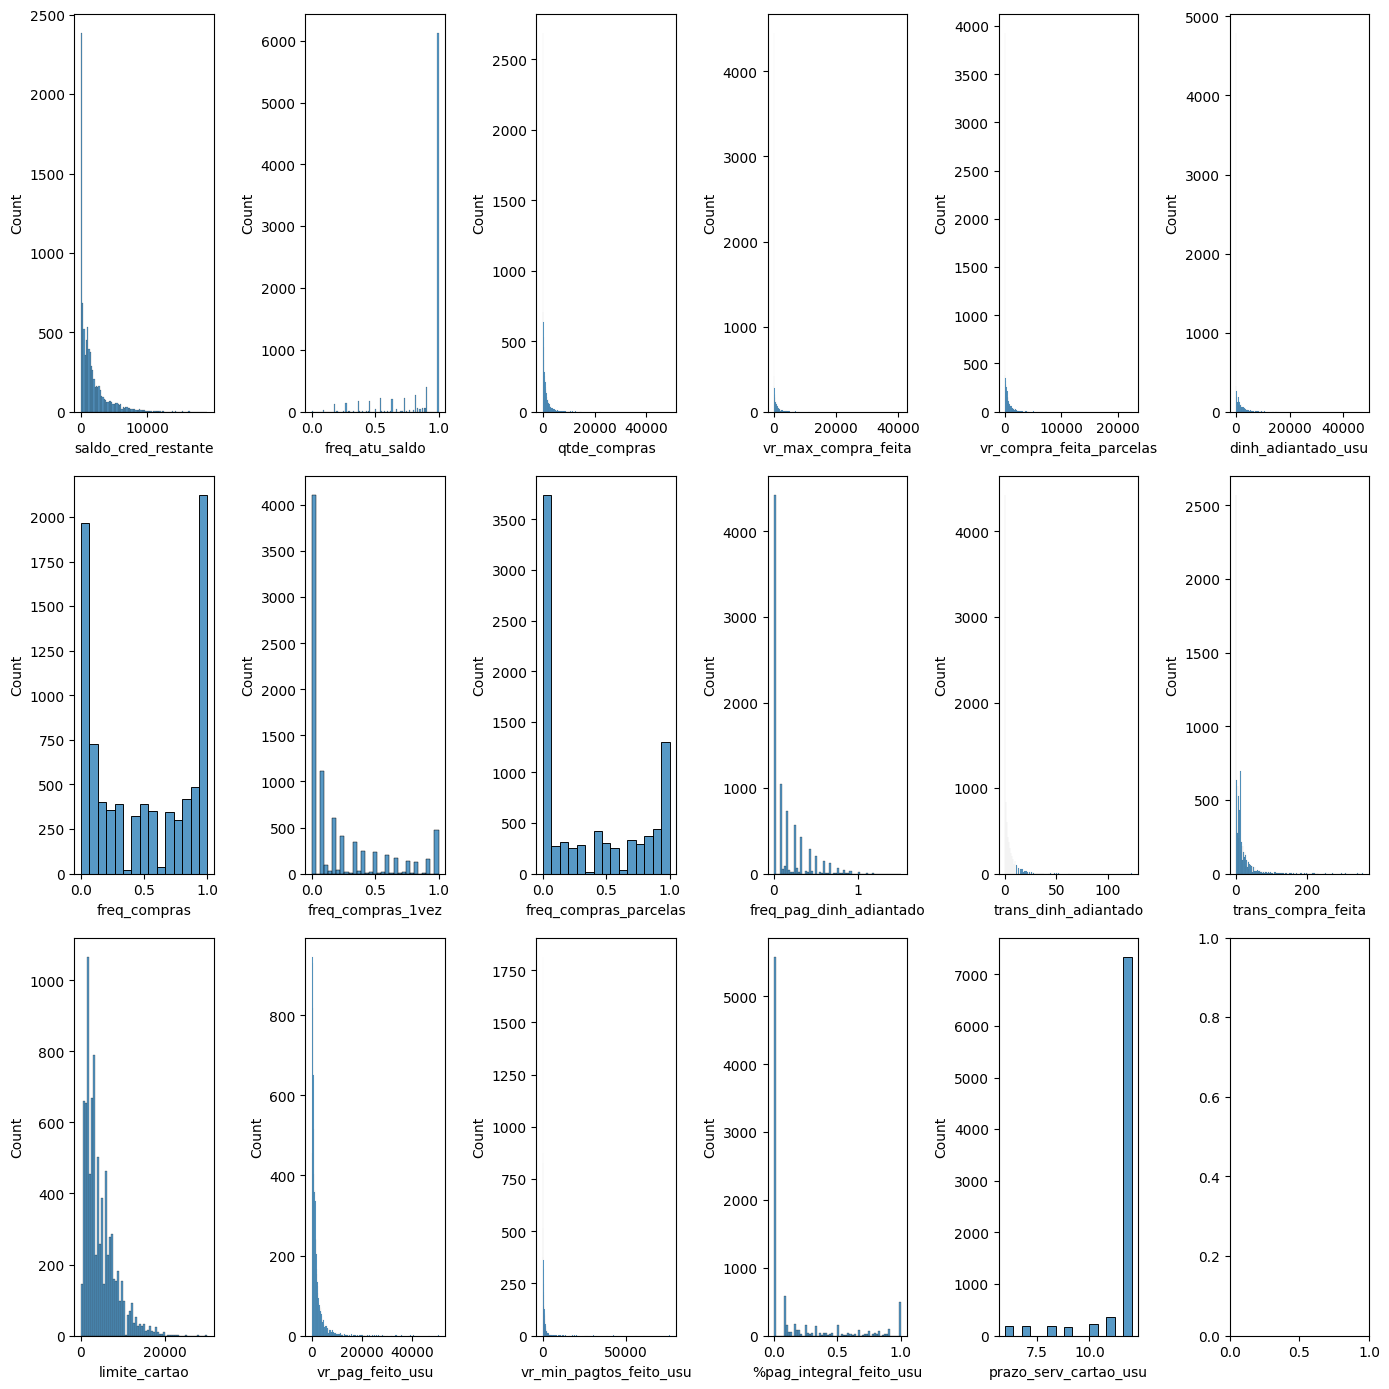

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), numerical_features):
    sns.histplot(x=feature, ax=ax, data=df_card)

plt.show()